In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Preprocessing

In [4]:
# chek null or empty values in the data
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
# drop irrelevant columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [6]:
# original data
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# chek null valus

df.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# chek shape of the data
df.shape

(5572, 2)

In [10]:
# chek duplicated rows

df.duplicated().sum()

403

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.rename(columns={'v1':'target','v2':'text_messages'}, inplace=True)

In [15]:
df.isna().sum()

target           0
text_messages    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
x = df['text_messages']
y = df['target']

In [18]:
# label encoding the target varibale

y = y.apply(lambda x: 1 if x=='spam' else 0)
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([('preprocessing',CountVectorizer()),('NB',MultinomialNB())])
pipeline

Pipeline(steps=[('preprocessing', CountVectorizer()), ('NB', MultinomialNB())])

In [23]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing', CountVectorizer()), ('NB', MultinomialNB())])

In [24]:
# Model training score

pipeline.score(x_train,y_train)

0.9939540507859734

In [26]:
# Model Testing Score

pipeline.score(x_test,y_test)

0.9748549323017408

In [28]:
# Model prediction

pipeline_prediction = pipeline.predict(x_test)
pipeline_prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
y_test

365     0
1025    0
2467    0
3681    0
177     0
       ..
4420    0
4492    0
4833    0
2296    1
2671    0
Name: target, Length: 1034, dtype: int64

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# classification Report

classification_report(pipeline_prediction,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       925\n           1       0.82      0.98      0.89       109\n\n    accuracy                           0.97      1034\n   macro avg       0.91      0.98      0.94      1034\nweighted avg       0.98      0.97      0.98      1034\n'

In [37]:
cm = confusion_matrix(pipeline_prediction,y_test)
cm

array([[901,  24],
       [  2, 107]], dtype=int64)

<Axes: >

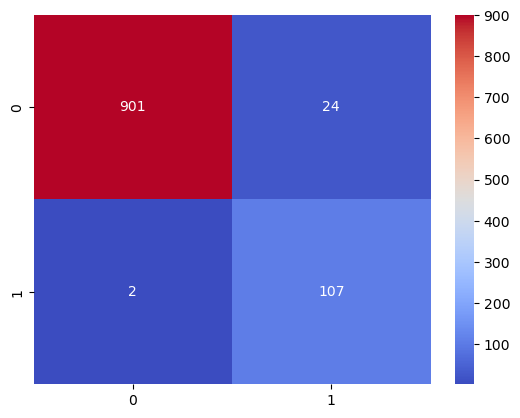

In [39]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')

# Thank You :)